# Introduction
This notebook appears to be an introductory demonstration of numfolio’s basic features using artificial data, ideal for users wanting to:

* Get a quick feel for how numfolio works
* Visualize financial time series
* Calculate simple metrics programmatically

In [1]:
import numpy as np
import pandas as pd
import numfolio as nf
import matplotlib.pyplot as plt

/tmp/ipykernel_58089/418558110.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_58089/418558110.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


,Historical,Bootstrapped
Sharpe-Ratio,-0.607587,-0.620652
VaR,4.026389,4.189912
Max-Drawdown,77.177536,82.107456


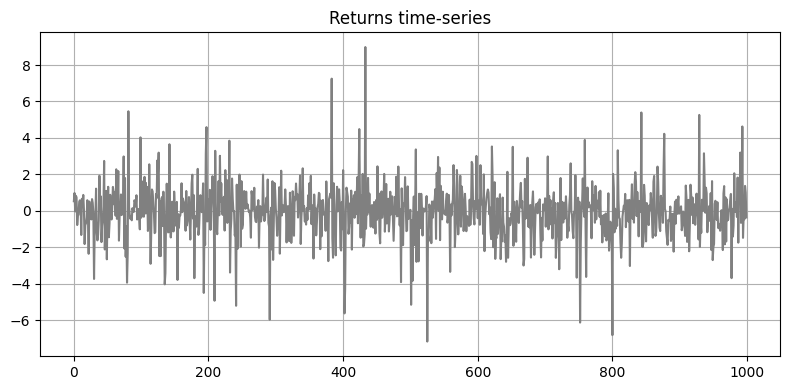

In [5]:
# create artificial data and compute statistics
rng = np.random.default_rng(42)
returns = rng.standard_t(size=1000, df=4)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(returns, color='gray')
ax.set_title('Returns time-series')
ax.grid()
fig.show()
fig.tight_layout()
fig.show()

metrics = {
    'Historical': {
        'Sharpe-Ratio': nf.compute_sharpe_ratio(returns),
        'VaR': nf.compute_var(returns, alpha=0.01),
        'Max-Drawdown': nf.compute_max_drawdown(returns)
    },
    'Bootstrapped': {
        'Sharpe-Ratio': nf.bootstrap_metric(returns, metric='sharpe_ratio').mean(),
        'VaR': nf.bootstrap_metric(returns, metric='var', alpha=0.01).mean(),
        'Max-Drawdown': nf.bootstrap_metric(returns, metric='max_drawdown').mean()
    }
}
pd.DataFrame(metrics)